

```
# author: puru panta (purupanta@uky.edu)
# date: 11/30/2024
# filename: PredictMLDL_Separate
```



**STEP1: Install and Import libraries required**

In [2]:
import json

In [3]:
# Mounting google drive if it is already not mounted
def LoadGoogleDrive(googleDriveDir):
  # Link Google Drive
  import os
  # Check if Google Drive is already mounted
  if not os.path.exists(googleDriveDir + "/MyDrive"):
      print("Mounting Google Drive...")
      from google.colab import drive
      drive.mount(googleDriveDir)
  else:
      print("Google Drive is already mounted!")

# Loading the AppConfig file
def LoadAppConfig(json_file_path):
  # Load JSON file into a Python dictionary
  with open(json_file_path, "r") as json_file:
      config_data = json.load(json_file)

  # Print loaded JSON data
  print("AppConfig JSON File Loaded Successfully!")
  # print(config_data)
  return config_data

# Loading the AppLib file
def AppLib_reload_script(script_path):
  # Load AppLib.py
  with open(script_path, 'r') as file:
      script_code = file.read()
      exec(script_code, globals())

**STEP2: Load goofle-drive, libraries, config file and application library file**

In [4]:
# Mount the google drive
googleDriveFolder = "/content/drive"
LoadGoogleDrive(googleDriveFolder)

# Load the AppConfig json file
json_file_path = googleDriveFolder + "/MyDrive/Colab Notebooks/HINTS6Finale/AppConfig.json"
config_data = LoadAppConfig(json_file_path)

# Load AppLib
lib_script_path = config_data["project_location"] + config_data["app_lib_path"] + config_data["app_lib_filename"]
print(f"Loading AppLib from: {lib_script_path}")
AppLib_reload_script(lib_script_path)


Mounting Google Drive...
Mounted at /content/drive
AppConfig JSON File Loaded Successfully!
Loading AppLib from: drive/MyDrive/Colab Notebooks/HINTS6Finale/lib/AppLib.py


In [5]:
requirements_path = config_data["project_location"] + config_data["requirements_file_name"]
AppLib.LoadRequirements(requirements_path)

Installing missing packages: ['tf-keras', 'scikit-learn', 'imbalanced-learn', 'xlsxwriter']
Installation completed successfully!
Please restart the runtime for changes to take effect.


**STEP3: Load the original data with filtered columns**

In [ ]:
# Define the output file path
ip_file_path = config_data["project_location"] + config_data["op_data_dir"] + config_data["op_file_name_cleaned"];
ip_sheet_name = config_data["op_file_sheet_name_cleaned"]
ip_load_data_cols = config_data["study_cols"]["target_cols"] + config_data["study_cols"]["predictor_cols"] + config_data["study_cols"]["predictor_cols0"]

# Loading cleaded excel data
df_rowColFilteredCleaned = AppLib.load_data(ip_file_path, ip_sheet_name, ip_load_data_cols)


Data Size: 87750, Data Shape: (4875, 18), (Flag: Loaded, original data)


In [ ]:
df = df_rowColFilteredCleaned.copy()

In [ ]:
import pandas as pd
# Summary statistics
from tabulate import tabulate

summary_stats = df.describe()
# summary_stats_t = summary_stats.T
summary_stats_t = summary_stats.transpose().drop(columns=['count', '25%', '50%', '75%'])
summary_stats_t = summary_stats_t.round(2)

# Print summary statistics in a readable table format
print(tabulate(summary_stats_t, headers='keys', tablefmt='pretty'))

# Export to Excel
op_summary_stat_file = googleDriveFolder + "/MyDrive/Colab Notebooks/HINTS6Finale/op_data/summary_statistics.xlsx"
summary_stats_t.to_excel(op_summary_stat_file, index=True)

print(f"Summary statistics saved to {op_summary_stat_file}")

# Display in a tabular format
# print(summary_stats)


+-------------------------------+--------+--------+------+--------+
|                               |  mean  |  std   | min  |  max   |
+-------------------------------+--------+--------+------+--------+
|        FreqGoProvider         |  2.96  |  1.84  | 0.0  |  6.0   |
|         GeneralHealth         |  2.62  |  0.93  | 1.0  |  5.0   |
|             Deaf              |  0.09  |  0.28  | 0.0  |  1.0   |
|    MedConditions_Diabetes     |  0.2   |  0.4   | 0.0  |  1.0   |
|     MedConditions_HighBP      |  0.43  |  0.5   | 0.0  |  1.0   |
| MedConditions_HeartCondition  |  0.09  |  0.29  | 0.0  |  1.0   |
|   MedConditions_LungDisease   |  0.14  |  0.34  | 0.0  |  1.0   |
|   MedConditions_Depression    |  0.27  |  0.44  | 0.0  |  1.0   |
|       AverageSleepNight       |  6.91  |  1.4   | 0.0  |  24.0  |
|      AverageTimeSitting       |  6.81  |  3.57  | 0.0  |  20.0  |
|         EverHadCancer         |  0.15  |  0.36  | 0.0  |  1.0   |
|              Age              | 54.96  | 17.22

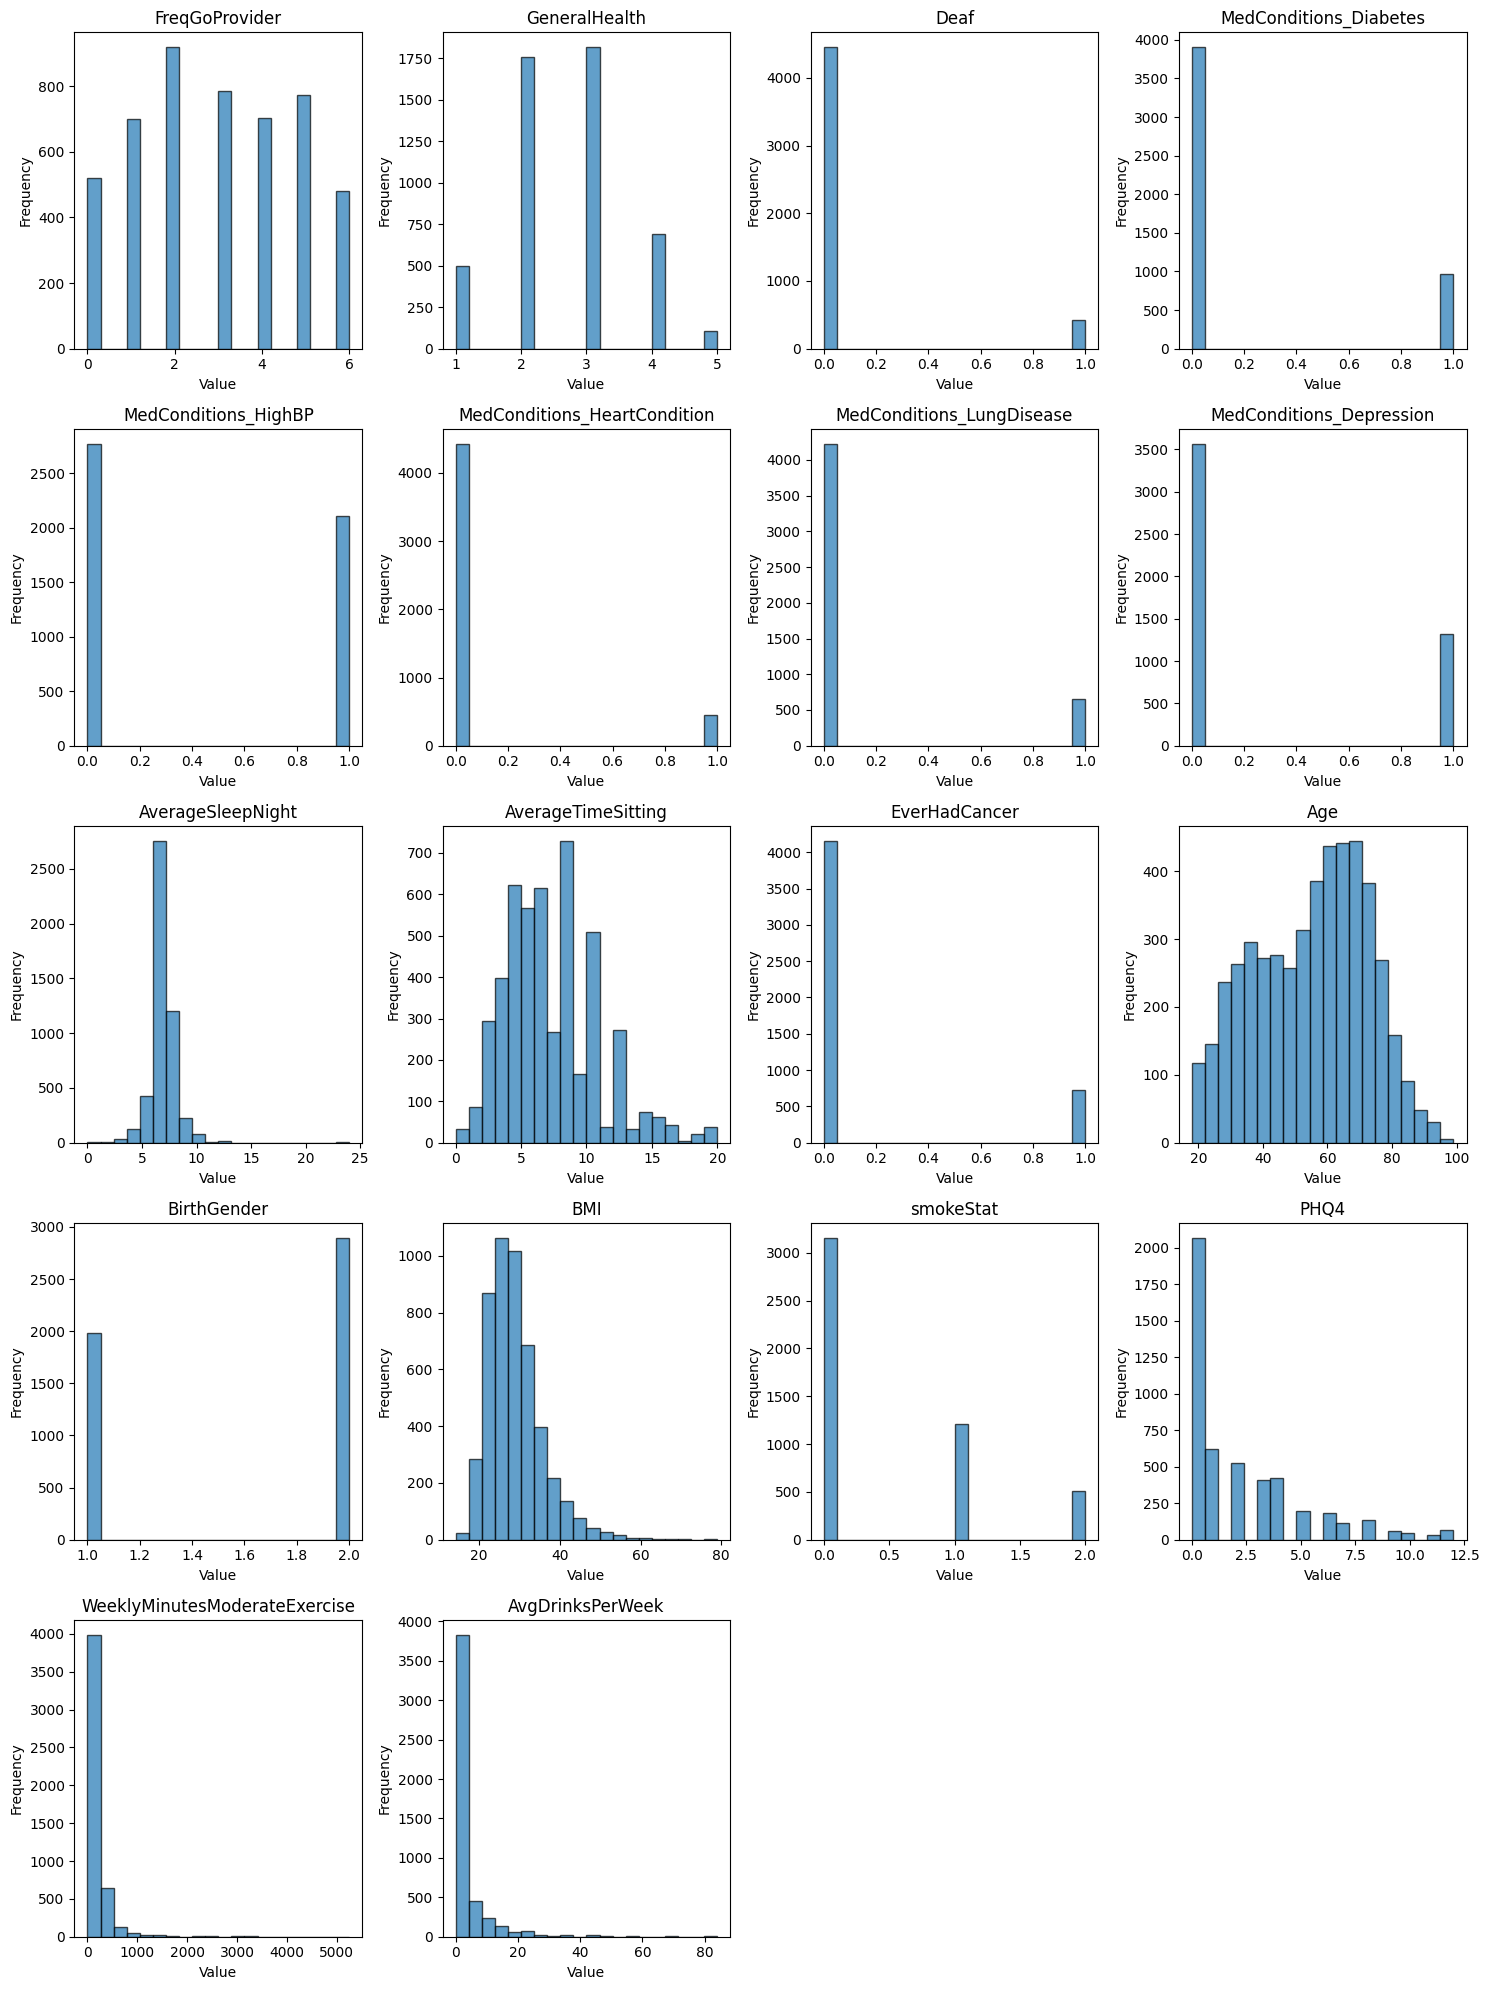

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only numerical columns
num_features = df.select_dtypes(include=['number']).columns

# Set up the figure size dynamically
num_plots = len(num_features)
cols = 4  # Number of columns per row
rows = (num_plots // cols) + (num_plots % cols > 0)  # Compute the required rows

# Create histograms for all numerical variables
plt.figure(figsize=(15, rows * 4))
for i, feature in enumerate(num_features, 1):
    plt.subplot(rows, cols, i)
    plt.hist(df[feature].dropna(), bins=20, alpha=0.7, edgecolor='black')
    plt.title(feature)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


In [ ]:
# Check unique values for categorical variables
# If the categorical_columns list is empty and the loop does not print anything, it means that your dataset does not contain any object (string/text) columns after cleaning (df).

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].unique()}")

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
## file_path = "your_file.xlsx"  # Update with the correct file path
## df = pd.read_excel(file_path)

# Check if 'MedConditions_HeartCondition' exists
if 'MedConditions_HeartCondition' not in df.columns:
    print("Column 'MedConditions_HeartCondition' not found in the dataset.")
else:
    # Compute the correlation matrix
    corr_matrix = df.corr()

    # Get correlations with 'MedConditions_HeartCondition' and sort in descending order
    target_col = 'MedConditions_HeartCondition'
    correlations = corr_matrix[target_col].dropna().sort_values(ascending=False)

    # Display the results
    print(correlations)

MedConditions_HeartCondition     1.000000
MedConditions_HighBP             0.230104
Age                              0.221075
GeneralHealth                    0.186402
MedConditions_Diabetes           0.165653
FreqGoProvider                   0.161091
MedConditions_LungDisease        0.124358
Deaf                             0.120120
EverHadCancer                    0.107033
smokeStat                        0.091451
MedConditions_Depression         0.048879
PHQ4                             0.045708
BMI                              0.043871
AverageTimeSitting               0.027829
AverageSleepNight               -0.020343
AvgDrinksPerWeek                -0.027198
WeeklyMinutesModerateExercise   -0.033576
BirthGender                     -0.090800
Name: MedConditions_HeartCondition, dtype: float64
